In [16]:
# Check your Python version
!python --version

Python 3.8.8


In [115]:
"""
Code borrowed from: 
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/saved_models/Emotion_Voice_Detection_Model.h5"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/AudioRecorder.ipynb"
"""

# Record and save a 4s recording as a WAV file named "output10", in the same location as this notebook file

import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 1 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


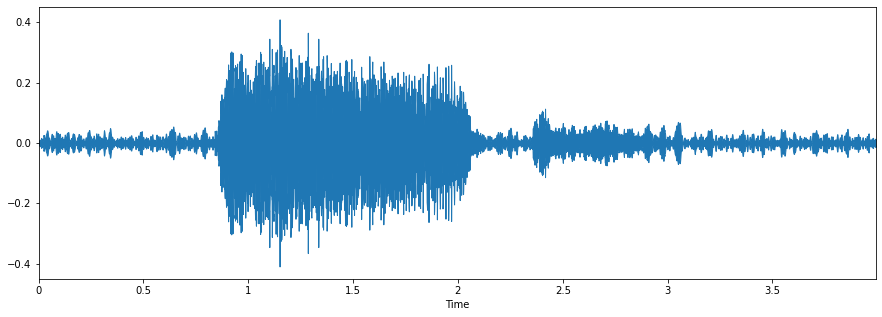

In [116]:
# Import our recording ("output10.wav") and plot the waveform

import librosa
from librosa.display import waveplot
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load('output10.wav')


import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
waveplot(data, sr=sampling_rate)

In [117]:
# Extract audio features (MFCCs) into a Numpy array
import numpy as np

#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [118]:
# Transfer data from Numpy array to Pandas dataframe
livedf2= pd.DataFrame(data=livedf2)
livedf2

,0
0,-16.131153
1,-14.791347
2,-15.244741
3,-14.779398
4,-15.402811
...,...
211,-12.304140
212,-10.797199
213,-12.100496
214,-12.028675


In [119]:
# Transpose dataframe so that rows become columns and columns become rows
livedf2 = livedf2.stack().to_frame().T

In [120]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-16.131153,-14.791347,-15.244741,-14.779398,-15.402811,-14.434525,-14.225332,-14.249226,-15.944174,-14.825744,...,-10.111361,-9.811498,-10.532233,-11.545554,-12.237086,-12.30414,-10.797199,-12.100496,-12.028675,-11.127584


In [121]:
# Take data into Numpy array and add another dimension
twodim= np.expand_dims(livedf2, axis=2)
twodim

array([[[-16.131153  ],
        [-14.791347  ],
        [-15.244741  ],
        [-14.779398  ],
        [-15.402811  ],
        [-14.434525  ],
        [-14.225332  ],
        [-14.249226  ],
        [-15.944174  ],
        [-14.825744  ],
        [-14.598757  ],
        [-15.63833   ],
        [-13.781091  ],
        [-13.49627   ],
        [-14.938775  ],
        [-14.481905  ],
        [-14.833888  ],
        [-15.971168  ],
        [-15.822369  ],
        [-15.283484  ],
        [-13.946949  ],
        [-14.151846  ],
        [-16.103664  ],
        [-16.205627  ],
        [-15.319011  ],
        [-14.269021  ],
        [-14.498338  ],
        [-14.43714   ],
        [-14.620452  ],
        [-11.904708  ],
        [-11.626672  ],
        [ -9.572962  ],
        [ -8.31656   ],
        [ -7.0879374 ],
        [ -5.685957  ],
        [ -6.3941836 ],
        [ -7.5355916 ],
        [ -5.111556  ],
        [ -2.7986257 ],
        [ -3.3821487 ],
        [ -2.9820175 ],
        [ -2.967

In [122]:
# Load in the pretrained H5 model called "Emotion_Voice_Detection_Model", the one we downloaded from "https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
import tensorflow as tf
loaded_model = tf.keras.models.load_model('Emotion_Voice_Detection_Model.h5')

In [123]:
# Let the H5 model make the prediction on our audio features (MFCCs)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 101ms/step


In [124]:
# Print out the percentage values of the output layer (Softmax output)
livepreds

array([[9.01042241e-10, 8.62484426e-24, 1.46393540e-11, 3.95138956e-11,
        3.96388168e-15, 9.76521969e-01, 5.46735805e-07, 1.05254715e-02,
        1.21865636e-02, 7.65430741e-04]], dtype=float32)

In [125]:
# Print out the label predicted by our H5 model
livepreds1=livepreds.argmax(axis=1)
print(livepreds1)

[5]


In [126]:
# Make sure the label is in integer format
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

[5]


In [127]:
# Define the encoding of the ten string labels into their respective integer labels (0-9), according to the order of the original H5 project ("https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer")
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

[0 1 2 3 4 5 6 7 8 9]


In [128]:
# Convert integer label to string label
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)

['male_angry']
